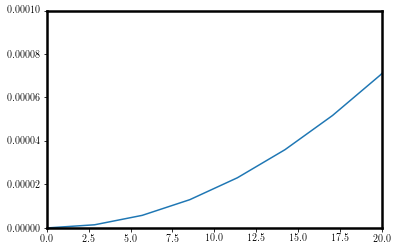

In [29]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#######

# v range
n = 300
v = linspace(0.01,850.0,n)

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
sig_beta = HaloModel.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)
day = 67.0 

sig3 = sig_iso


sigr = sig3[0]
sigphi = sig3[1]
sigz = sig3[2]
v_shift = array([0.0,0.0,0.0])

beta = 1.0-(sigphi**2.0+sigz**2.0)/(2*sigr**2.0)
N_esc = Nesc_Isotropic(sigr,v_esc)

N = 1.0/(N_esc*(2*pi)**(1.5)*sigr*sigphi*sigz)
n = size(v)
fv1 = zeros(shape=n)

v_off = -v_shift
v_max = v_esc

vv_off = sqrt(sum(v_off**2.0))
vr = (v_max-vv_off)*sqrt(1-C**2.0)*cos(P)+v_off[0]
vphi = (v_max-vv_off)*sqrt(1-C**2.0)*sin(P)+v_off[1]
vz = (v_max-vv_off)*C+v_off[2]
V = sqrt(vr**2.0+vphi**2.0+vz**2.0)
Fcorr = N*exp(-(vr**2.0/(2*sigr**2.0))\
              -(vz**2.0/(2*sigz**2.0))\
              -(vphi**2.0/(2*sigphi**2.0)))
for i in range(0,n):
    v1 = v[i]
    vr = v1*sqrt(1-C**2.0)*cos(P)+v_off[0]
    vphi = v1*sqrt(1-C**2.0)*sin(P)+v_off[1]
    vz = v1*C+v_off[2]
    V = sqrt(vr**2.0+vphi**2.0+vz**2.0)

    F  = N*exp(-(vr**2.0/(2*sigr**2.0))\
               -(vz**2.0/(2*sigz**2.0))\
               -(vphi**2.0/(2*sigphi**2.0)))*(V<v_max)

    F = F-Fcorr
    fv1[i] = (v1**2.0)*dth*dph*sum(sum(F))
fv1[v>v_max] = 0.0
#fv1 /= trapz(fv1,v)


plt.plot(v,fv1)
plt.ylim([0,0.0001])
plt.xlim([0,20])
plt.show()


In [13]:
vv_off = sqrt(sum(v_off**2.0))
vr = (v_max-vv_off)*sqrt(1-C**2.0)*cos(P)+v_off[0]
vphi = (v_max-vv_off)*sqrt(1-C**2.0)*sin(P)+v_off[1]
vz = (v_max-vv_off)*C+v_off[2]
V = sqrt(vr**2.0+vphi**2.0+vz**2.0)
Fcorr = N*exp(-(vr**2.0/(2*sigr**2.0))\
              -(vz**2.0/(2*sigz**2.0))\
              -(vphi**2.0/(2*sigphi**2.0)))

In [30]:
>>> import galpy.potential
>>> print([p for p in dir(galpy.potential) if 'Potential' in p])

['BurkertPotential', 'CorotatingRotationWrapperPotential', 'CosmphiDiskPotential', 'DehnenBarPotential', 'DehnenSmoothWrapperPotential', 'DiskSCFPotential', 'DoubleExponentialDiskPotential', 'EllipsoidalPotential', 'EllipticalDiskPotential', 'FerrersPotential', 'FlattenedPowerPotential', 'GaussianAmplitudeWrapperPotential', 'HenonHeilesPotential', 'HernquistPotential', 'InterpSnapshotRZPotential', 'IsochronePotential', 'JaffePotential', 'KGPotential', 'KeplerPotential', 'KuzminDiskPotential', 'KuzminKutuzovStaeckelPotential', 'LogarithmicHaloPotential', 'LopsidedDiskPotential', 'MN3ExponentialDiskPotential', 'MWPotential', 'MWPotential2014', 'MiyamotoNagaiPotential', 'MovingObjectPotential', 'NFWPotential', 'PerfectEllipsoidPotential', 'PlummerPotential', 'Potential', 'PotentialError', 'PowerSphericalPotential', 'PowerSphericalPotentialwCutoff', 'PseudoIsothermalPotential', 'RZToplanarPotential', 'RZToverticalPotential', 'RazorThinExponentialDiskPotential', 'RingPotential', 'SCFPotenti